# Example relatedness scripts

This notebook shows some example scripts for genetic relatedness analyses 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from genomic_tools import stats, relatedness
import scipy.stats as sci_stats

Assume we have a set of 50 samples with their frequencies of 20 haplotypes:

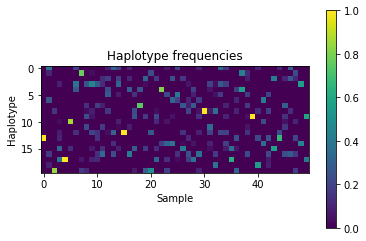

In [14]:
#This is generating artificial data, the methodology is not important
n_samples = 50
n_haplotypes = 20
data = np.zeros((n_samples, n_haplotypes))
for sample in range(n_samples):
    #complexity of infection
    coi = np.random.randint(1,10)
    for i in range(coi):
        data[sample][np.random.randint(n_haplotypes)] += np.random.rand()
    data[sample]/=np.sum(data[sample])

plt.imshow(data.T)
plt.colorbar()
plt.xlabel('Sample')
plt.ylabel('Haplotype')
plt.title('Haplotype frequencies')
plt.show()

We can measure the genetic relatedness between two samples (e.g. samples 0 and 3) using different metrics: 
- Binary sharing: 0 (False) if the samples have nothing in common, 1 (True) if they do have a common haplotype

In [29]:
relatedness.jaccard_dist(data[0], data[3]) < 1

True

- Jaccard distance: inverse of proportion of common haplotypes 

In [30]:
relatedness.jaccard_dist(data[0], data[3])

0.8333333333333334

 - L1: the sum of the modulus of the frequency differences

In [31]:
relatedness.L1(data[0], data[3])

0.08951916844935777

- L2: Euclidean distance 

In [32]:
relatedness.dist(data[0], data[3])

1.0296940659041673

- Pearson Correlation Coefficient: linear correlation between the haplotype frequencies 

In [34]:
sci_stats.pearsonr(data[0], data[3])[0]

0.11991827379274406

We can generate a matrix with all the pariwise relatedness of the whole population using any of these methods: 

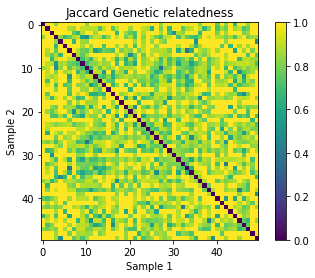

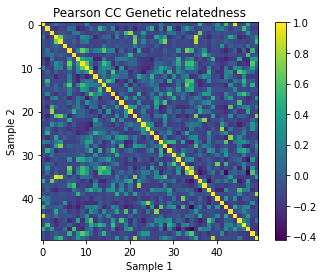

In [37]:
rel_mat_jaccard = relatedness.relatedness_mat(data, data, method = 'jaccard')

plt.imshow(rel_mat_jaccard)
plt.xlabel('Sample 1')
plt.ylabel('Sample 2')
plt.title('Jaccard Genetic relatedness')
plt.colorbar()
plt.show()

rel_mat_pcorr = relatedness.relatedness_mat(data, data, method = 'pcorr')

plt.imshow(rel_mat_pcorr)
plt.xlabel('Sample 1')
plt.ylabel('Sample 2')
plt.title('Pearson CC Genetic relatedness')
plt.colorbar()
plt.show()

We can calculate the average relatedness of the population with its Bootstrap error: 

In [42]:
mean_rel, error, mean_resamples = stats.mat_bootstrap_mean_err(data, data, method = 'jaccard')
print("Mean: ", mean_rel, " Error: ", error)

mean_rel, error, mean_resamples = stats.mat_bootstrap_mean_err(data, data, method = 'pcorr')
print("Mean: ", mean_rel, " Error: ", error)

Mean:  0.8794279529993816  Error:  0.007516103251163246
Mean:  -0.001056943446796996  Error:  0.008458026268410091
